In [258]:
from pandas import *
import pandas as pd
%matplotlib inline  
import sklearn as scikit_learn

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

# Series

In [146]:
random.randn(5)

array([ 1.27746858, -0.49651799,  0.05430095, -0.50508404, -2.58874196])

In [147]:
labels=['a','b','c','d','e']
s=Series(random.randn(5),index=labels)
s

a   -0.398241
b    1.285598
c    0.317780
d    0.814944
e    1.228222
dtype: float64

In [148]:
'b' in s 

True

In [149]:
s['b']

1.285597606335029

In [150]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [151]:
mapping=s.to_dict()
mapping

{'a': -0.39824099516783973,
 'b': 1.285597606335029,
 'c': 0.31778041868717644,
 'd': 0.81494383223858413,
 'e': 1.2282222936615168}

In [152]:
s=Series(mapping)

In [153]:
s

a   -0.398241
b    1.285598
c    0.317780
d    0.814944
e    1.228222
dtype: float64

In [154]:
s=Series(mapping,index=['b','e','a','d'])

In [155]:
s

b    1.285598
e    1.228222
a   -0.398241
d    0.814944
dtype: float64

In [156]:
s=Series(mapping,index=['b','e','a','d','f'])

In [157]:
s

b    1.285598
e    1.228222
a   -0.398241
d    0.814944
f         NaN
dtype: float64

In [158]:
isnull(s)

b    False
e    False
a    False
d    False
f     True
dtype: bool

In [159]:
s[notnull(s)]

b    1.285598
e    1.228222
a   -0.398241
d    0.814944
dtype: float64

In [160]:
s[isnull(s)]

f   NaN
dtype: float64

In [161]:
s.dropna()

b    1.285598
e    1.228222
a   -0.398241
d    0.814944
dtype: float64

In [162]:
s*2

b    2.571195
e    2.456445
a   -0.796482
d    1.629888
f         NaN
dtype: float64

In [163]:
arr=random.rand(5)

In [164]:
arr[:3]

array([ 0.60274892,  0.4063968 ,  0.71435211])

In [165]:
s[:3]

b    1.285598
e    1.228222
a   -0.398241
dtype: float64

# DataFrame:2d collection of Series

In [166]:
df=DataFrame({'a':np.random.randn(6),'b':['foo','bar']*3,'c':np.random.randn(6)})

In [167]:
df

,a,b,c
0,-0.348819,foo,0.212994
1,0.021642,bar,0.258905
2,-0.367898,foo,1.906585
3,-0.769405,bar,-1.576026
4,-0.111407,foo,-0.572915
5,-1.114185,bar,-0.294098


In [168]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [169]:
df.columns

Index([u'a', u'b', u'c'], dtype='object')

In [170]:
df['a'].head(3)

0   -0.348819
1    0.021642
2   -0.367898
Name: a, dtype: float64

In [171]:
df['d']=random.randn(6)

In [172]:
df

,a,b,c,d
0,-0.348819,foo,0.212994,-0.564425
1,0.021642,bar,0.258905,-1.231367
2,-0.367898,foo,1.906585,-1.144451
3,-0.769405,bar,-1.576026,0.774393
4,-0.111407,foo,-0.572915,0.467948
5,-1.114185,bar,-0.294098,-1.098931


In [173]:
np.tile(['foo','bar'],3)

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [174]:
df[-2:]

,a,b,c,d
4,-0.111407,foo,-0.572915,0.467948
5,-1.114185,bar,-0.294098,-1.098931


In [175]:
df[:-1]

,a,b,c,d
0,-0.348819,foo,0.212994,-0.564425
1,0.021642,bar,0.258905,-1.231367
2,-0.367898,foo,1.906585,-1.144451
3,-0.769405,bar,-1.576026,0.774393
4,-0.111407,foo,-0.572915,0.467948


In [176]:
df.xs(0)

a   -0.348819
b         foo
c    0.212994
d   -0.564425
Name: 0, dtype: object

In [177]:
df.xs(0).index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [178]:
df.loc[2:4,['c','b']]

,c,b
2,1.906585,foo
3,-1.576026,bar
4,-0.572915,foo


In [179]:
df.loc[2:4,'b':'c']

,b,c
2,foo,1.906585
3,bar,-1.576026
4,foo,-0.572915


In [180]:
df[df['c']<0]

,a,b,c,d
3,-0.769405,bar,-1.576026,0.774393
4,-0.111407,foo,-0.572915,0.467948
5,-1.114185,bar,-0.294098,-1.098931


In [181]:
df=DataFrame({'a':np.random.randn(6),'b':['foo','bar']*3,'c':np.random.randn(6)},index=pd.date_range('1/1/2000',periods=6))

In [182]:
df

,a,b,c
2000-01-01,1.181006,foo,-2.419573
2000-01-02,0.396552,bar,0.355277
2000-01-03,2.472842,foo,-1.834912
2000-01-04,0.877090,bar,0.390691
2000-01-05,1.158332,foo,-2.591904
2000-01-06,-1.016652,bar,0.218276


In [183]:
df=DataFrame({'a':np.random.randn(6),
             'b':['fo','bar']*3,
             'c':np.random.randn(6)},
            columns=['a','b','c','d',])

In [184]:
df

,a,b,c,d
0,-0.979298,fo,1.093674,NaN
1,-0.980510,bar,1.063055,NaN
2,0.859419,fo,-0.035013,NaN
3,-1.527002,bar,-0.697996,NaN
4,-0.612911,fo,-0.572588,NaN
5,-0.366828,bar,1.297662,NaN


# creation from nested dict

In [185]:
data={}
for col in ['foo','bar','baz']:
    for row in ['a','b','c','d']:
        data.setdefault(col,{})[row]=random.randn()

In [186]:
data

{'bar': {'a': -0.3399453812989266,
  'b': -0.16301119875319636,
  'c': 0.03538871498447167,
  'd': -0.6247022353203159},
 'baz': {'a': 0.2612028883494694,
  'b': 1.01650388711918,
  'c': -1.1367010999194676,
  'd': 0.6350522002805955},
 'foo': {'a': -0.8529411551231244,
  'b': 1.7233263327649146,
  'c': 0.7407344019878712,
  'd': -0.04045044322435257}}

In [187]:
DataFrame(data)

,bar,baz,foo
a,-0.339945,0.261203,-0.852941
b,-0.163011,1.016504,1.723326
c,0.035389,-1.136701,0.740734
d,-0.624702,0.635052,-0.040450


In [188]:
del data['foo']['c']

In [189]:
DataFrame(data)

,bar,baz,foo
a,-0.339945,0.261203,-0.852941
b,-0.163011,1.016504,1.723326
c,0.035389,-1.136701,NaN
d,-0.624702,0.635052,-0.040450


# Data Alignment

In [190]:
close_px=read_csv(r'C:\Users\abhij\Desktop\pandas-exercises-master\stock_data.csv',index_col=0,parse_dates=True)

In [191]:
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32


In [192]:
s1=close_px['AAPL'][-20]
s2=close_px['AAPL'][-25:-10]
side_by_side(s1,s2)

411.63    2011-09-12    379.94      
          2011-09-13    384.62      
          2011-09-14    389.30      
          2011-09-15    392.96      
          2011-09-16    400.50      
          2011-09-19    411.63      
          2011-09-20    413.45      
          2011-09-21    412.14      
          2011-09-22    401.82      
          2011-09-23    404.30      
          2011-09-26    403.17      
          2011-09-27    399.26      
          2011-09-28    397.01      
          2011-09-29    390.57      
          2011-09-30    381.32      
          Name: AAPL, dtype: float64


In [193]:
s1+s2

2011-09-12    791.57
2011-09-13    796.25
2011-09-14    800.93
2011-09-15    804.59
2011-09-16    812.13
2011-09-19    823.26
2011-09-20    825.08
2011-09-21    823.77
2011-09-22    813.45
2011-09-23    815.93
2011-09-26    814.80
2011-09-27    810.89
2011-09-28    808.64
2011-09-29    802.20
2011-09-30    792.95
Name: AAPL, dtype: float64

In [194]:
df=close_px.iloc[-10:,:3]

In [195]:
df.head()

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50


In [196]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

AttributeError: 'numpy.float64' object has no attribute 'align'

In [197]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

AttributeError: 'numpy.float64' object has no attribute 'align'

In [198]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

AttributeError: 'numpy.float64' object has no attribute 'align'

In [199]:
df1=close_px.ix[-10:,['AAPL','IBM','MSFT']]

C:\Users\abhij\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [200]:
df1

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [201]:
df2=close_px.ix[::2,['IBM','MSFT']]

In [202]:
side_by_side(df1,df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2007-10-29  106.78  31.78
2011-10-04  372.50  174.74  25.34    2007-10-31  108.01  33.84
2011-10-05  378.25  176.85  25.89    2007-11-02  106.59  34.07
2011-10-06  377.37  181.69  26.34    2007-11-06  105.27  33.47
2011-10-07  369.80  182.39  26.25    2007-11-08   99.05  31.94
2011-10-10  388.81  186.62  26.94    2007-11-12   94.70  30.69
2011-10-11  400.29  185.00  27.00    2007-11-14   96.56  31.30
2011-10-12  402.19  186.12  26.96    2007-11-16   97.82  31.44
2011-10-13  408.43  186.82  27.18    2007-11-20   96.54  31.90
2011-10-14  422.00  190.53  27.27    2007-11-23   97.13  31.46
                                     2007-11-27   96.92  30.49
                                     2007-11-29  100.35  30.98
                                     2007-12-03   98.79  30.36
                                     2007-12-05  100.97  31.50
                                     2007-12-07  101.62

In [203]:
df3=df1+df2

In [204]:
b,c=df1.align(df2,join='inner')
side_by_side(b,c)

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


# Transposing:no copy if all columns are same type

In [205]:
df=close_px

In [206]:
df[:5].T

,2007-10-29 00:00:00,2007-10-30 00:00:00,2007-10-31 00:00:00,2007-11-01 00:00:00,2007-11-02 00:00:00
AA,37.41,36.43,36.79,35.22,35.83
AAPL,185.09,187.00,189.95,187.44,187.87
GE,34.46,34.39,34.97,34.27,34.27
IBM,106.78,106.15,108.01,105.72,106.59
JNJ,57.13,56.99,57.30,56.85,56.95
MSFT,31.78,32.70,33.84,34.07,34.07
PEP,65.67,65.80,65.69,64.51,65.03
SPX,1540.98,1531.02,1549.38,1508.44,1509.65
XOM,85.51,83.25,84.03,80.84,80.32


# Columns can be any type 

In [207]:
n=10
foo=DataFrame(index=range(n))
foo['floats']=random.randn(n)
foo['ints']=np.arange(n)
foo['strings']=['foo','boo']*(n/2)
foo['objects']=date_range('1/1/2000',periods=n)

In [208]:
foo

,floats,ints,strings,objects
0,-0.198352,0,foo,2000-01-01
1,0.351274,1,boo,2000-01-02
2,1.638393,2,foo,2000-01-03
3,-1.924702,3,boo,2000-01-04
4,1.581400,4,foo,2000-01-05
5,0.055835,5,boo,2000-01-06
6,0.115056,6,foo,2000-01-07
7,-0.067775,7,boo,2000-01-08
8,0.489141,8,foo,2000-01-09
9,-0.551730,9,boo,2000-01-10


In [209]:
foo.dtypes

floats            float64
ints                int32
strings            object
objects    datetime64[ns]
dtype: object

In [210]:
foo.T

,0,1,2,3,4,5,6,7,8,9
floats,-0.198352,0.351274,1.63839,-1.9247,1.5814,0.0558348,0.115056,-0.0677751,0.489141,-0.55173
ints,0,1,2,3,4,5,6,7,8,9
strings,foo,boo,foo,boo,foo,boo,foo,boo,foo,boo
objects,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,2000-01-09 00:00:00,2000-01-10 00:00:00


In [211]:
foo.T.T

,floats,ints,strings,objects
0,-0.198352,0,foo,2000-01-01 00:00:00
1,0.351274,1,boo,2000-01-02 00:00:00
2,1.63839,2,foo,2000-01-03 00:00:00
3,-1.9247,3,boo,2000-01-04 00:00:00
4,1.5814,4,foo,2000-01-05 00:00:00
5,0.0558348,5,boo,2000-01-06 00:00:00
6,0.115056,6,foo,2000-01-07 00:00:00
7,-0.0677751,7,boo,2000-01-08 00:00:00
8,0.489141,8,foo,2000-01-09 00:00:00
9,-0.55173,9,boo,2000-01-10 00:00:00


# Function application
We can apply arbitrary functions to the rows or columns of a DataFrame

In [212]:
df=close_px

In [213]:
df.apply(np.mean)

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [214]:
df.mean()

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [215]:
# to get the mean of the first row based on a columsn.Also exlcudes missing data (NaN:not a numer)
df.mean(1).head()

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
dtype: float64

In [216]:
df.mean(1,skipna=False)  #flag skipna :to include Nan.In this data ,no NaN.

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
2007-11-05    233.175556
2007-11-06    236.181111
2007-11-07    229.647778
2007-11-08    228.185556
2007-11-09    223.683333
2007-11-12    220.516667
2007-11-13    228.068889
2007-11-14    226.210000
2007-11-15    223.495556
2007-11-16    224.961111
2007-11-19    221.380000
2007-11-20    223.208889
2007-11-21    220.244444
2007-11-23    223.656667
2007-11-26    219.301111
2007-11-27    222.401111
2007-11-28    228.524444
2007-11-29    229.073333
2007-11-30    229.925556
2007-12-03    228.267778
2007-12-04    227.237778
2007-12-05    230.928889
2007-12-06    234.421111
2007-12-07    234.565556
2007-12-10    236.094444
                 ...    
2011-09-02    218.662222
2011-09-06    217.857778
2011-09-07    222.717778
2011-09-08    220.898889
2011-09-09    215.554444
2011-09-12    216.945556
2011-09-13    218.850000
2011-09-14    221.893333
2011-09-15    225.426667


In [217]:
df.apply(np.mean,axis=1) # same as above

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
2007-11-05    233.175556
2007-11-06    236.181111
2007-11-07    229.647778
2007-11-08    228.185556
2007-11-09    223.683333
2007-11-12    220.516667
2007-11-13    228.068889
2007-11-14    226.210000
2007-11-15    223.495556
2007-11-16    224.961111
2007-11-19    221.380000
2007-11-20    223.208889
2007-11-21    220.244444
2007-11-23    223.656667
2007-11-26    219.301111
2007-11-27    222.401111
2007-11-28    228.524444
2007-11-29    229.073333
2007-11-30    229.925556
2007-12-03    228.267778
2007-12-04    227.237778
2007-12-05    230.928889
2007-12-06    234.421111
2007-12-07    234.565556
2007-12-10    236.094444
                 ...    
2011-09-02    218.662222
2011-09-06    217.857778
2011-09-07    222.717778
2011-09-08    220.898889
2011-09-09    215.554444
2011-09-12    216.945556
2011-09-13    218.850000
2011-09-14    221.893333
2011-09-15    225.426667


In [218]:
close_px.AAPL.head()

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
Name: AAPL, dtype: float64

In [219]:
close_px.AAPL.idxmax() #gives index of tis maximum value

Timestamp('2011-10-14 00:00:00')

In [220]:
close_px.AAPL.index[] # If you are numpy aficionado, does the same thing.

SyntaxError: invalid syntax (<ipython-input-220-82095caa06d1>, line 1)

In [221]:
def peak_date(series):
    return series.index[series.argmax()]    # new method: series.idxmax()
close_px.apply(peak_date)

ValueError: occurred at index AA

In [222]:
df.apply(lambda x:x.max()-x.min()) #np.ptp

AA       36.76
AAPL    343.80
GE       28.78
IBM     122.39
JNJ      24.56
MSFT     19.74
PEP      28.79
SPX     872.85
XOM      32.63
dtype: float64

In [223]:
np.log(close_px)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019
2007-11-05,3.561614,5.226714,3.530763,4.658521,4.037774,3.519573,4.171923,7.314666,4.382901
2007-11-06,3.579065,5.256401,3.530470,4.656528,4.039536,3.510650,4.181897,7.326643,4.413525
2007-11-07,3.548467,5.227358,3.502550,4.641406,4.028739,3.485845,4.166045,7.296834,4.381527
2007-11-08,3.555348,5.167468,3.501043,4.595625,4.039360,3.463859,4.182050,7.296257,4.406719
2007-11-09,3.540089,5.108185,3.484619,4.538817,4.048126,3.434310,4.181745,7.281867,4.377516


# Plotting

In [224]:
close_px[['AAPL','IBM','MSFT','XOM']].head()

,AAPL,IBM,MSFT,XOM
2007-10-29,185.09,106.78,31.78,85.51
2007-10-30,187.00,106.15,32.70,83.25
2007-10-31,189.95,108.01,33.84,84.03
2007-11-01,187.44,105.72,34.07,80.84
2007-11-02,187.87,106.59,34.07,80.32


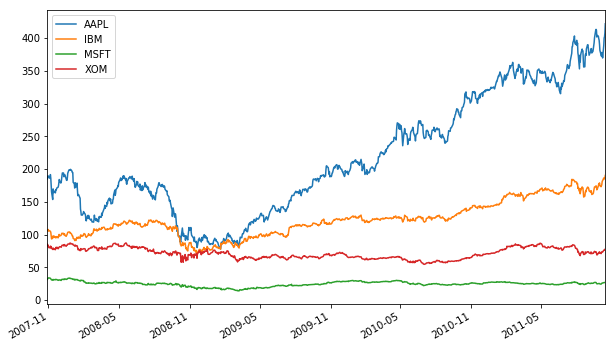

In [237]:
close_px[['AAPL','IBM','MSFT','XOM']].plot()

In [238]:
close_px.iloc[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00, dtype: float64

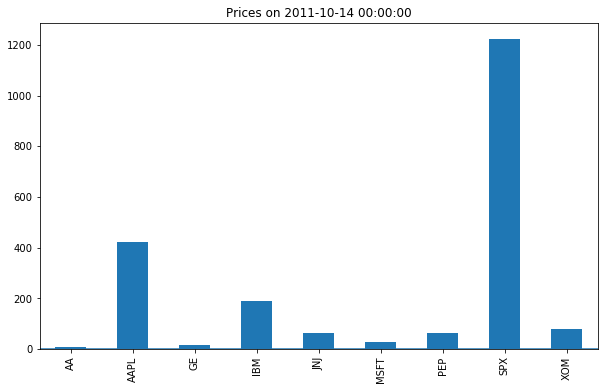

In [239]:
close_px.iloc[-1].plot(kind='bar')
plt.title('Prices on %s' % close_px.index[-1])
plt.axhline(0)

#  Hierarchical Indexing 

In [228]:
index=MultiIndex(levels=[['foo','bar','baz','qux'],['one','two','three']],labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf=DataFrame(np.random.randn(10,3),index=index,columns=['A','B','C'])

In [229]:
hdf

A         B         C
foo one   -1.553892  0.113046  0.437603
    two    1.067778 -0.238468 -0.196865
    three  0.049747  0.300654 -1.105675
bar one    0.485553 -1.531675 -0.361036
    two   -0.215824  0.919282 -0.439861
baz two   -0.110272 -1.249476 -0.943162
    three -1.188253 -1.348138 -0.715439
qux one   -1.674312 -0.876105 -1.016558
    two   -1.330107  1.436056  0.793003
    three -0.299646 -0.238612  1.456787

In [230]:
hdf.loc['foo']

,A,B,C
one,-1.553892,0.113046,0.437603
two,1.067778,-0.238468,-0.196865
three,0.049747,0.300654,-1.105675


In [231]:
hdf.loc['foo']=0
hdf

A         B         C
foo one    0.000000  0.000000  0.000000
    two    0.000000  0.000000  0.000000
    three  0.000000  0.000000  0.000000
bar one    0.485553 -1.531675 -0.361036
    two   -0.215824  0.919282 -0.439861
baz two   -0.110272 -1.249476 -0.943162
    three -1.188253 -1.348138 -0.715439
qux one   -1.674312 -0.876105 -1.016558
    two   -1.330107  1.436056  0.793003
    three -0.299646 -0.238612  1.456787

In [232]:
hdf.loc['foo','three']

A    0.0
B    0.0
C    0.0
Name: (foo, three), dtype: float64

#  Stacking and Unstacking

In [247]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('A', 'dog'),
                                  ('B', 'cat'), ('B', 'dog')])
df = DataFrame(random.randn(8, 4), index=index, columns=columns)
df

A                   B          
              cat       dog       cat       dog
bar one  0.074771 -0.339794 -1.671142  0.779822
    two  0.347876  0.357173  2.583022 -0.464525
baz one  0.296588 -0.820141  0.339410 -1.076743
    two -1.738068 -0.269046  0.992044  0.257442
foo one  0.727610  0.288919  0.627585  0.944372
    two  0.368074  0.097394  0.799724 -0.117955
qux one  0.574131  1.469434 -0.346089 -1.541580
    two -1.039355  0.453386  0.289280 -1.038773

In [248]:
df2=df.iloc[[0,1,2,4,5,7]]
df2
df.unstack()['B']

cat                 dog          
          one       two       one       two
bar -1.671142  2.583022  0.779822 -0.464525
baz  0.339410  0.992044 -1.076743  0.257442
foo  0.627585  0.799724  0.944372 -0.117955
qux -0.346089  0.289280 -1.541580 -1.038773

# GroupBy

In [250]:
df=DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
              'B':['one','one','two','three','two','two','one','three'],
              'C':random.randn(8),
             'D':random.randn(8)})

In [251]:
for key,value in df.groupby('A'):
    print key
    print value

bar
     A      B         C         D
1  bar    one  1.775164 -1.017235
3  bar  three -0.397331  0.369049
5  bar    two -0.446685  1.870836
foo
     A      B         C         D
0  foo    one  1.770730 -1.040877
2  foo    two -0.416070  0.172627
4  foo    two  0.336176  0.768126
6  foo    one -0.162964 -0.040275
7  foo  three -0.014001  0.666853


In [252]:
df.groupby('A')['C'].describe().T

A,bar,foo
count,3.000000,5.000000
mean,0.310383,0.302774
std,1.268778,0.864582
min,-0.446685,-0.416070
25%,-0.422008,-0.162964
50%,-0.397331,-0.014001
75%,0.688917,0.336176
max,1.775164,1.770730


In [253]:
df.groupby('A').mean()

,C,D
A,,
bar,0.310383,0.407550
foo,0.302774,0.105291


In [254]:
for key, group in df.groupby('A'):
    print key
    print group

bar
     A      B         C         D
1  bar    one  1.775164 -1.017235
3  bar  three -0.397331  0.369049
5  bar    two -0.446685  1.870836
foo
     A      B         C         D
0  foo    one  1.770730 -1.040877
2  foo    two -0.416070  0.172627
4  foo    two  0.336176  0.768126
6  foo    one -0.162964 -0.040275
7  foo  three -0.014001  0.666853


In [255]:
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one    1.775164 -1.017235
    three -0.397331  0.369049
    two   -0.446685  1.870836
foo one    0.803883 -0.540576
    three -0.014001  0.666853
    two   -0.039947  0.470376

In [256]:
df.groupby(['A', 'B'], as_index=False).mean()

,A,B,C,D
0,bar,one,1.775164,-1.017235
1,bar,three,-0.397331,0.369049
2,bar,two,-0.446685,1.870836
3,foo,one,0.803883,-0.540576
4,foo,three,-0.014001,0.666853
5,foo,two,-0.039947,0.470376


#  GroupBy example: linear regression by group

In [260]:
#import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = scikit_learn.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

C:\Users\abhij\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AttributeError: 'module' object has no attribute 'OLS'

In [261]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

AttributeError: 'module' object has no attribute 'OLS'

# GroupBy with Heirarchical indexing

In [263]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(random.randn(8, 4), index=index, columns=columns)
df

A         B                   A
              cat       dog       cat       dog
bar one -0.405950 -2.439277 -0.558237 -1.124981
    two -0.126715  0.170143  0.054101 -0.907404
baz one -2.044193  1.435714 -0.792175 -0.465521
    two -0.748032  0.299985  1.628287 -0.100665
foo one  2.488917 -0.023421 -0.361377 -1.779980
    two -0.245965  0.900381 -1.537513  0.103978
qux one  0.331572 -0.015077 -0.236813 -0.959520
    two -0.637766 -0.661155 -0.289358  1.966432

In [264]:
df.groupby(level=0, axis=0).mean()

A         B                   A
          cat       dog       cat       dog
bar -0.266333 -1.134567 -0.252068 -1.016192
baz -1.396112  0.867849  0.418056 -0.283093
foo  1.121476  0.438480 -0.949445 -0.838001
qux -0.153097 -0.338116 -0.263086  0.503456

In [265]:
df.stack()

A         B
bar one cat -0.405950 -0.558237
        dog -1.124981 -2.439277
    two cat -0.126715  0.054101
        dog -0.907404  0.170143
baz one cat -2.044193 -0.792175
        dog -0.465521  1.435714
    two cat -0.748032  1.628287
        dog -0.100665  0.299985
foo one cat  2.488917 -0.361377
        dog -1.779980 -0.023421
    two cat -0.245965 -1.537513
        dog  0.103978  0.900381
qux one cat  0.331572 -0.236813
        dog -0.959520 -0.015077
    two cat -0.637766 -0.289358
        dog  1.966432 -0.661155

In [266]:
df.stack().mean(1).unstack()

cat       dog
bar one -0.482094 -1.782129
    two -0.036307 -0.368631
baz one -1.418184  0.485097
    two  0.440128  0.099660
foo one  1.063770 -0.901701
    two -0.891739  0.502179
qux one  0.047379 -0.487298
    two -0.463562  0.652638

In [267]:
# could also have done
df.groupby(level=1, axis=1).mean()

cat       dog
bar one -0.482094 -1.782129
    two -0.036307 -0.368631
baz one -1.418184  0.485097
    two  0.440128  0.099660
foo one  1.063770 -0.901701
    two -0.891739  0.502179
qux one  0.047379 -0.487298
    two -0.463562  0.652638